<H1>American Sign Language (ASL)</H1>
ASL is the main form of communication for the Deaf and Hard-of-Hearing community in America. People with disabilities including Autism, Apraxia of speech, Cerebral Palsy, and Down Syndrome may also find this sign language beneficial for communicating.
<br/>

In this notebook, I will train a convolutional neural network to classify images of American Sign Language (ASL) letters. 







<H1>1. Importing Dataset</H1>
I have used ASL Dataset from Kaggle.

Dataset link: 
<a> https://www.kaggle.com/grassknoted/asl-alphabet </a>

The following blocks of codes are being used to import the dataset from kaggle.

In [ ]:
#!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggl2.json to kaggl2.json


{'kaggl2.json': b'{ "username": " *Insert user name* ", "key": " *Insert key* " }\r\n'}

Note: I have hidden my Kaggle API key. While running this, please use your own API key.

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#change permission
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d grassknoted/asl-alphabet

asl-alphabet.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
file_name = "asl-alphabet.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')


Done


<h1>2. Importing necessary libraries </h1>

In [ ]:
%tensorflow_version 2.x
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import os
import cv2

<h1>3. Loading images to create train and test dataset<h1>

In [ ]:
# setting up directories
train_dir = "/content/asl_alphabet_train/asl_alphabet_train"
test_dir = "/content/asl_alphabet_test/asl_alphabet_test"

In [ ]:
#function to load train images from asl_alphabet_train folder.
#subfolder name is used to create labels for each image.
def load__train_images(directory):
    images = []
    labels = []
    for idx, label in enumerate(uniq_labels):
        for file in os.listdir(directory + "/" + label):
            filepath = directory + "/" + label + "/" + file
            image = cv2.resize(cv2.imread(filepath), (64, 64))
            images.append(image)
            labels.append(idx)
    images = np.array(images)
    labels = np.array(labels)
    return(images, labels)

In [ ]:
#function to load test images from asl_alphabet_test folder
def load_test_images(directory):
    images = []
    labels = []
    for idx, label in enumerate(uniq_labels2):
        filepath = directory + "/" + label
        image = cv2.resize(cv2.imread(filepath), (64, 64))
        images.append(image)
        labels.append(idx)
    images = np.array(images)
    labels = np.array(labels)
    return(images, labels)

In [ ]:
#train folder images
uniq_labels = sorted(os.listdir(train_dir))
images, labels = load__train_images(directory = train_dir)
print(uniq_labels)
print(np.unique(labels))

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]


In [ ]:
#test folder
uniq_labels2 = sorted(os.listdir(test_dir))
X_test, y_test = load_test_images(directory = test_dir)
print(uniq_labels2)
print(np.unique(y_test))

['A_test.jpg', 'B_test.jpg', 'C_test.jpg', 'D_test.jpg', 'E_test.jpg', 'F_test.jpg', 'G_test.jpg', 'H_test.jpg', 'I_test.jpg', 'J_test.jpg', 'K_test.jpg', 'L_test.jpg', 'M_test.jpg', 'N_test.jpg', 'O_test.jpg', 'P_test.jpg', 'Q_test.jpg', 'R_test.jpg', 'S_test.jpg', 'T_test.jpg', 'U_test.jpg', 'V_test.jpg', 'W_test.jpg', 'X_test.jpg', 'Y_test.jpg', 'Z_test.jpg', 'nothing_test.jpg', 'space_test.jpg']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]


In [ ]:
#splitting the images set into train and validation set.

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size = 0.1, stratify = labels)

print("X_train shape: ",X_train.shape)
print("X_val shape: ",X_val.shape)
print("X_test shape: ",X_test.shape)

X_train shape:  (78300, 64, 64, 3)
X_val shape:  (8700, 64, 64, 3)
X_test shape:  (28, 64, 64, 3)


In [ ]:
#function for printing one image of each class. [train and validation dataset]

def print_images(image_list):
    n = int(len(image_list) / len(uniq_labels))
    fig = plt.figure(figsize = (10, 20))

    for i in range(len(uniq_labels)):
        ax = plt.subplot(6, 5, i + 1)
        plt.imshow(image_list[int(n*i)])
        plt.title(uniq_labels[i])
        ax.title.set_fontsize(20)
        ax.axis('off')
    plt.show()

Training Images: 


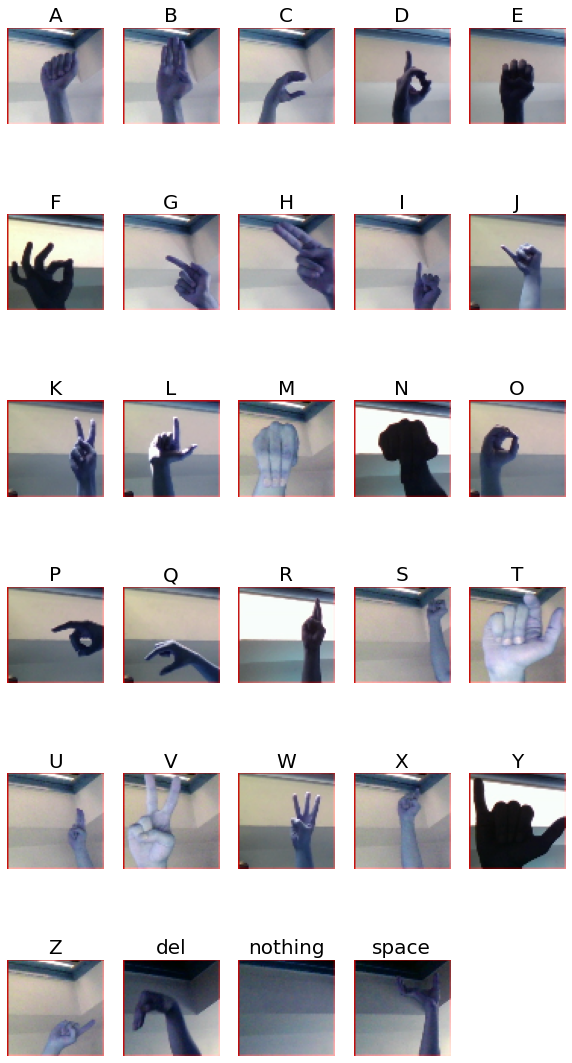

In [ ]:
#training images
y_train_in = y_train.argsort()
y_train = y_train[y_train_in]
X_train = X_train[y_train_in]


print("Training Images: ")
print_images(X_train)

validation images: 


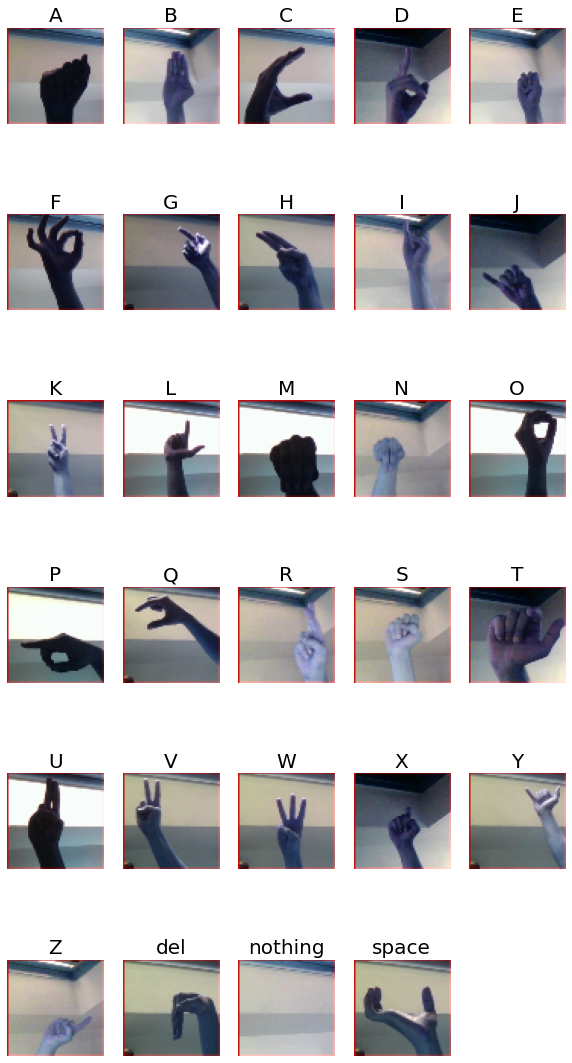

In [ ]:
#validation images
y_val_in = y_val.argsort()
y_val = y_val[y_val_in]
X_val = X_val[y_val_in]

print("validation images: ")
print_images(image_list = X_val)

Test images: 


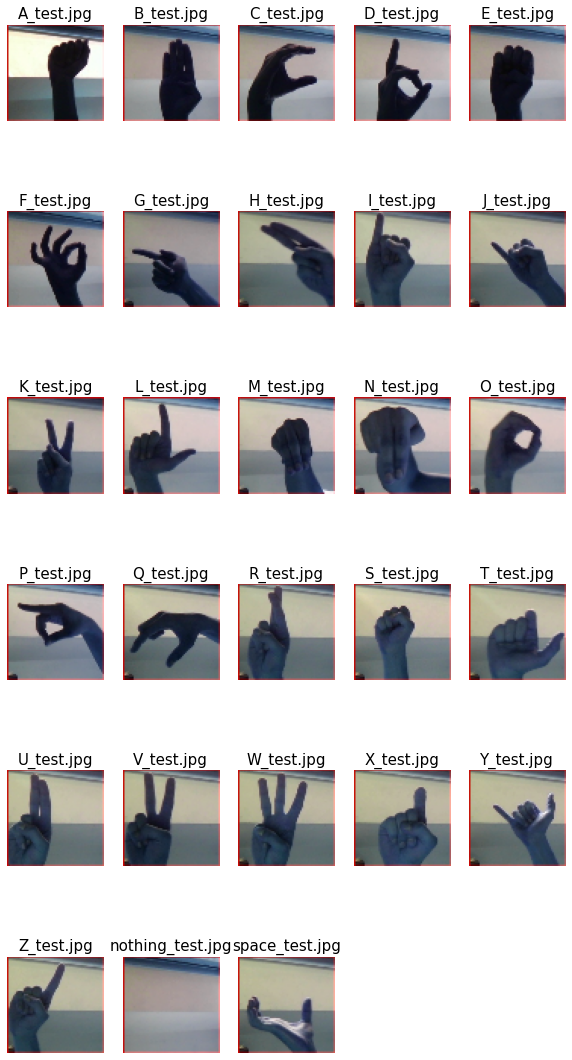

In [ ]:
#test images
def print_test_images(image_list):
    n = int(len(image_list) / len(uniq_labels2))
    fig = plt.figure(figsize = (10, 20))

    for i in range(len(uniq_labels2)):
        ax = plt.subplot(6, 5, i + 1)
        plt.imshow(image_list[int(n*i)])
        plt.title(uniq_labels2[i])
        ax.title.set_fontsize(15)
        ax.axis('off')
    plt.show()

y_test_in = y_test.argsort()
y_test = y_test[y_test_in]
X_test = X_test[y_test_in]

print("Test images: ")
print_test_images(X_test)


<h1>4. Preprocessing and Normalize RGB values</h1>

In [ ]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
y_val = keras.utils.to_categorical(y_val)

In [ ]:
#scaling up each pixel value between -1 and 1
X_train = (X_train.astype('float32')/127.5)-1.0
X_test = (X_test.astype('float32')/127.5)-1.0
X_val = (X_val.astype('float32')/127.5)-1.0

<h1>5. Buliding classification model using CNN<h2>

In [ ]:
model=keras.models.Sequential([
    
    keras.layers.Conv2D(32,kernel_size=3,strides=1,padding='same',activation='relu',input_shape=(64,64,3)),
    keras.layers.Conv2D(32,kernel_size=3,strides=2,padding='same',activation='relu'), 

    keras.layers.Conv2D(64,kernel_size=3,strides=1,padding='same',activation='relu'),
    keras.layers.Conv2D(64,kernel_size=3,strides=2,padding='same',activation='relu'),   
    
    keras.layers.Conv2D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    keras.layers.Conv2D(128,kernel_size=3,strides=2,padding='same',activation='relu'),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(29,activation='softmax')    
      
    
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 128)         147584    
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)             

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 16, epochs=10)

Epoch 1/10
4894/4894 [==============================] - 78s 16ms/step - loss: 0.3388 - accuracy: 0.8943 - val_loss: 0.0462 - val_accuracy: 0.9846
Epoch 2/10
4894/4894 [==============================] - 77s 16ms/step - loss: 0.0518 - accuracy: 0.9842 - val_loss: 0.0428 - val_accuracy: 0.9870
Epoch 3/10
4894/4894 [==============================] - 77s 16ms/step - loss: 0.0334 - accuracy: 0.9910 - val_loss: 0.0181 - val_accuracy: 0.9938
Epoch 4/10
4894/4894 [==============================] - 77s 16ms/step - loss: 0.0291 - accuracy: 0.9921 - val_loss: 0.0183 - val_accuracy: 0.9946
Epoch 5/10
4894/4894 [==============================] - 78s 16ms/step - loss: 0.0235 - accuracy: 0.9938 - val_loss: 0.0297 - val_accuracy: 0.9923
Epoch 6/10
4894/4894 [==============================] - 77s 16ms/step - loss: 0.0195 - accuracy: 0.9952 - val_loss: 0.0020 - val_accuracy: 0.9992
Epoch 7/10
4894/4894 [==============================] - 77s 16ms/step - loss: 0.0226 - accuracy: 0.9945 - val_loss: 0.0165 -

<H1>6. Model Testing<H1>

In [ ]:
score = model.evaluate(x = X_train, y = y_train, verbose = 0)
print('Accuracy for train images:', round(score[1]*100, 3), '%')
score = model.evaluate(x = X_val, y = y_val, verbose = 0)
print('Accuracy for evaluation images:', round(score[1]*100, 3), '%')

Accuracy for train images: 99.563 %
Accuracy for evaluation images: 99.494 %


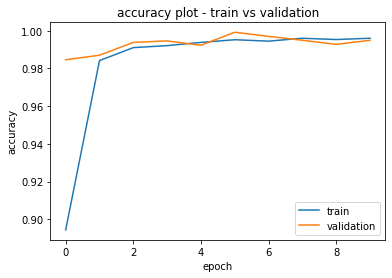

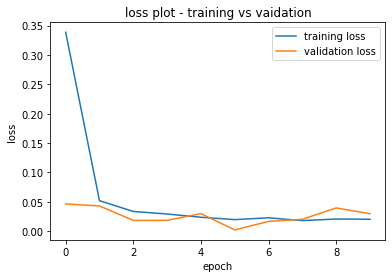

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'validation'], loc='lower right')
plt.title('accuracy plot - train vs validation')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss', 'validation loss'], loc = 'upper right')
plt.title('loss plot - training vs vaidation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

<h1>7. Predicting test images </h1>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Predicted output:  28
Actual output: 27


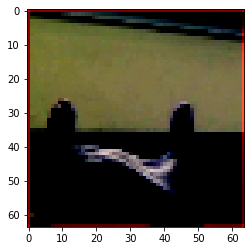

In [ ]:
#predicting single image
print("Predicted output: ",np.argmax(model.predict(X_test[27][np.newaxis, :, :, 0:3])))
print("Actual output:",np.argmax(y_test[27]))
plt.imshow(X_test[27,:,:,0:3])


In [ ]:
#For predicting all the test images.
# make predictions on an image and append it to the list (predictions).
predictions=[]
actual=[]
for i in range(len(uniq_labels2)):
  pred = np.argmax(model.predict(X_test[i][np.newaxis, :, :, 0:3]))
  if pred > 26:
    pred = pred - 1 #as del image is note there in test set
  act = np.argmax(y_test[i])
  predictions.append(uniq_labels2[pred])
  actual.append(uniq_labels2[act])

print(predictions)
print(actual)

['A_test.jpg', 'B_test.jpg', 'C_test.jpg', 'D_test.jpg', 'E_test.jpg', 'F_test.jpg', 'G_test.jpg', 'H_test.jpg', 'I_test.jpg', 'J_test.jpg', 'K_test.jpg', 'L_test.jpg', 'M_test.jpg', 'N_test.jpg', 'O_test.jpg', 'P_test.jpg', 'Q_test.jpg', 'R_test.jpg', 'S_test.jpg', 'T_test.jpg', 'U_test.jpg', 'V_test.jpg', 'W_test.jpg', 'X_test.jpg', 'Y_test.jpg', 'Z_test.jpg', 'nothing_test.jpg', 'space_test.jpg']
['A_test.jpg', 'B_test.jpg', 'C_test.jpg', 'D_test.jpg', 'E_test.jpg', 'F_test.jpg', 'G_test.jpg', 'H_test.jpg', 'I_test.jpg', 'J_test.jpg', 'K_test.jpg', 'L_test.jpg', 'M_test.jpg', 'N_test.jpg', 'O_test.jpg', 'P_test.jpg', 'Q_test.jpg', 'R_test.jpg', 'S_test.jpg', 'T_test.jpg', 'U_test.jpg', 'V_test.jpg', 'W_test.jpg', 'X_test.jpg', 'Y_test.jpg', 'Z_test.jpg', 'nothing_test.jpg', 'space_test.jpg']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

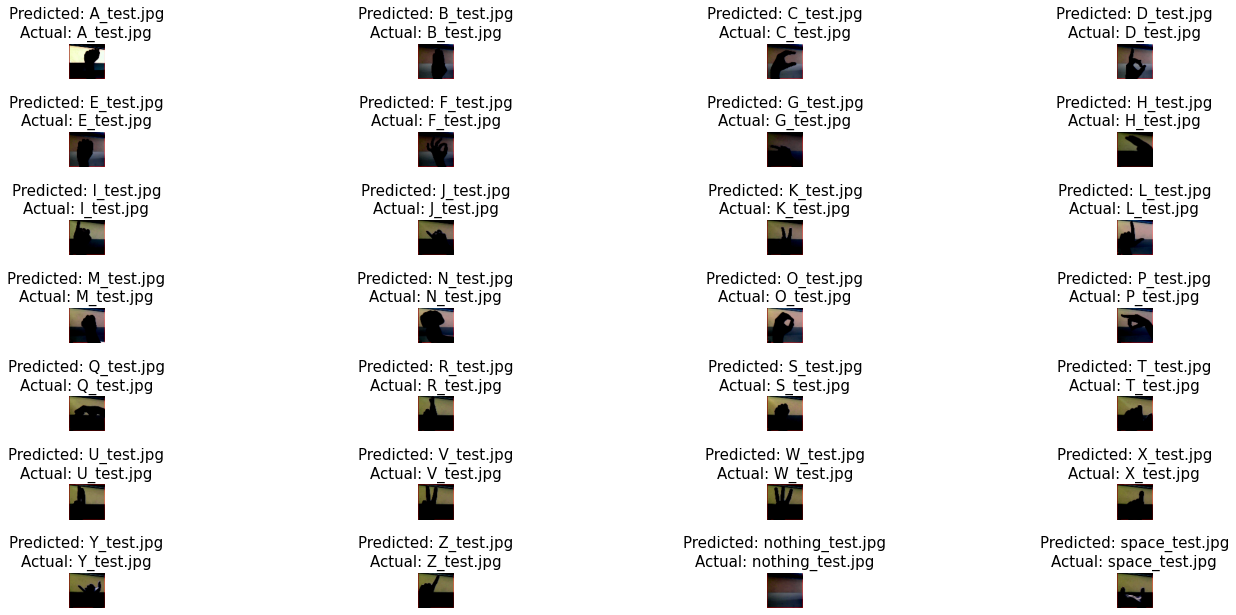

In [ ]:
fig = plt.figure(figsize = (24, 12))
for i in range(len(uniq_labels2)):
    ax = plt.subplot(8, 4, i+1)
    plt.subplots_adjust(hspace=1.5)
    plt.imshow(X_test[i,:,:,0:3])
    plt.title("Predicted: " + predictions[i] + "\nActual: " + actual[i])
    ax.title.set_fontsize(15)
    ax.axis('off')
plt.show()